## Abrindo bibliotecas

In [1]:
import copy, os, sys, re
import numpy as np
from IPython.display import Image, display

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root0 = 'drive/MyDrive'
root_aula = 'Colab Notebooks/aulas/seqs_fasta_202504'
root_data = os.path.join(root0, root_aula)
os.listdir(root_data)

['ex01_python.ipynb',
 'images',
 'fasta',
 'ex02_sharing_a_drive.ipynb',
 'ex03_creating_finding_fasta.ipynb',
 'ex04_reading_working_with_fasta.ipynb']

In [4]:
root_imagens = os.path.join(root_data, 'images')
root_fastas = os.path.join(root_data, 'fasta')

print(root_imagens)
print(root_fastas)

drive/MyDrive/Colab Notebooks/aulas/seqs_fasta_202504/images
drive/MyDrive/Colab Notebooks/aulas/seqs_fasta_202504/fasta


In [5]:
os.listdir(root_fastas)

['cox2_protein.fasta',
 'cox2_dna.fasta',
 'cox2_protein_aligned.fasta',
 'cox2_dna_aligned.fasta']

### Instalando biopython

In [6]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.0 MB/s eta 0:00:00


## Abrindos as bibliotecas BioPython e matplotlib (gráficos)

In [7]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

## Construindo minhas próprias funções

In [14]:
def getDnaNucleotides():
    return ['A','T','G','C']

def getDnaNucleotideString():
    return 'ATGC'

def getRnaNucleotides():
    return ['A','U','G','C']

def getSeqAA():
    return ['A', 'M', 'C', 'F', 'L', 'V', 'I', 'G', 'T', 'S', 'W', 'Y', 'P', 'H', 'N', 'D', 'E', 'Q', 'K', 'R']

def getAaPos(string, aa):
    return string.find(aa)

# leitor de fasta
def readFastaSequence(fileName):

    if not os.path.exists(fileName):
        print(f"Could not find '{fileName}'")
        return False, [], []

    print(f"Reading ... '{fileName}'")

    seq_records = []
    seqs = []
    try:
        for seq_rec in SeqIO.parse(fileName, "fasta"):
            seq_records.append(seq_rec)
            seqs.append( list(seq_rec.seq) )

    except ValueError:
        print(f"Exception {ValueError}: error reading file: '{fileName}'" )
        return False, [], []

    return True, seq_records, seqs

In [9]:
getDnaNucleotides()

['A', 'T', 'G', 'C']

## Entrar no NCBI

https://www.ncbi.nlm.nih.gov/

### Procurar a base nucleotide

https://www.ncbi.nlm.nih.gov/nuccore/

## Gene COX2

### O arquivo existe?

  - seqs DNA: cox2_dna_aligned.fasta
  - seqs Proteina: cox2_protein_aligned.fasta

In [13]:
fname = 'cox2_dna_aligned.fasta'
filename = os.path.join(root_fastas, fname)

os.path.exists(filename), filename

(True,
 'drive/MyDrive/Colab Notebooks/aulas/seqs_fasta_202504/fasta/cox2_dna_aligned.fasta')

## seq_records

  - sequence records
    - lista de objetos de sequência lidos no fasta
    - atributos:
      - id
      - description
      - seq (sequência)

In [16]:
ret, seq_records, seqs = readFastaSequence(filename)
ret

Reading ... 'drive/MyDrive/Colab Notebooks/aulas/seqs_fasta_202504/fasta/cox2_dna_aligned.fasta'


True

In [17]:
len(seq_records), len(seqs)

(73, 73)

In [18]:
len(seq_records[0]), len(seqs[0])

(543, 543)

In [19]:
# id
seq_records[0].id

'lcl|KC753688.1_cds_AHH34784.1_1'

In [20]:
# descricao
seq_records[0].description

'lcl|KC753688.1_cds_AHH34784.1_1 [gene=cox2] [protein=cytochrome c oxidase subunit II] [protein_id=AHH34784.1] [location=<1..>543] [gbkey=CDS]'

In [22]:
# objeto sequência (Seq)
seq_records[0].seq

Seq('TTTCATGATCACGCCCTCATAATCATTTTCCTTATCTGCTTCCTAGTCCTGTAT...AAC')

In [23]:
stri = str(seq_records[0].seq)
type(stri), stri

(str,
 'TTTCATGATCACGCCCTCATAATCATTTTCCTTATCTGCTTCCTAGTCCTGTATGCCCTTTTCCTAACACTCACAACAAAACTAACTAATACTAACATCTCAGACGCTCAAGAAATAGAGACCGTCTGAACTATCCTGCCCGCCATCATCCTAGTCCTCATCGCCCTCCCATCCCTACGCATCCTTTACATAACAGACGAGGTCAACGATCCCTCCCTTACCATCAAATCAATTGGCCACCAATGGTACTGAACCTACGAGTACACCGACTACGGCGGACTAATCTTCAACTCCTACATACTTCCCCCATTATTCCTAGAACCAGGCGACCTGCGACTCCTTGACGTTGACAATCGAGTAGTACTCCCGATTGAAGCCCCCATTCGTATAATAATTACATCACAAGACGTCTTGCACTCATGAGCTGTCCCCACATTAGGCTTAAAAACAGATGCAATTCCCGGACGTCTAAACCAAACCACTTTCACCGCTACACGACCGGGGGTATACTACGGTCAATGCTCTGAAATCTGTGGAGCAAAC')

### Para ler colunas precisamos transformar seqs em numpy.array(seqs)

In [24]:
seqs = np.array(seqs)

In [26]:
# linha 0,1,2 e colunas de 0 a 10
seqs[0:3, 0:10]

array([['T', 'T', 'T', 'C', 'A', 'T', 'G', 'A', 'T', 'C'],
       ['T', 'T', 'T', 'C', 'A', 'T', 'G', 'A', 'T', 'C'],
       ['T', 'T', 'T', 'C', 'A', 'T', 'G', 'A', 'T', 'C']], dtype='<U1')

In [29]:
# coluna 25, as 10 primeiras linhas
# Python começa de zero --> zero é posição 1, logo posicao 25 e coluna 24
seqs[0:10, 24]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

### Como contar que nucleotídeos existem em cada coluna?
  - use Counter (de collections)

In [30]:
from collections import Counter

In [31]:
j=24

seq_vert = seqs[:, j]
print(j)
print(seq_vert)
print('')

24
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A']



In [32]:
# dic é um dicionario
dic = Counter(seq_vert)

In [33]:
# dicionário tem chaves (key) de acesso
dic.keys()

dict_keys([np.str_('A')])

In [35]:
# tem 73 A's
dic['A']

73

### Todas as colunas (resíduos de nucleotídeos)

In [36]:
L = len(seqs[0])
# comprimento da sequencia 0 (ou todas as sequencias uma vez que estão alinhadas)
L

543

In [38]:
for j in range(L):
    seq_vert = seqs[:, j]
    print(j, end='')
    dic = Counter(seq_vert)
    for key, val in dic.items():
        print('\t', key, val)

    if j==9: break

0	 T 73
1	 T 73
2	 T 73
3	 C 73
4	 A 73
5	 T 73
6	 G 73
7	 A 73
8	 T 73
9	 C 73


### Existem mutações?

In [40]:
for j in range(L):
    seq_vert = seqs[:, j]
    dic = Counter(seq_vert)
    if len(dic) == 1:
        print('>>> Sem', j, end='')
        for key, val in dic.items():
            print('\t', key, val)
    else:
        print('>>> Mut', j)
        for key, val in dic.items():
            print('\t', key, val)


>>> Sem 0	 T 73
>>> Sem 1	 T 73
>>> Sem 2	 T 73
>>> Sem 3	 C 73
>>> Sem 4	 A 73
>>> Sem 5	 T 73
>>> Sem 6	 G 73
>>> Sem 7	 A 73
>>> Sem 8	 T 73
>>> Sem 9	 C 73
>>> Sem 10	 A 73
>>> Sem 11	 C 73
>>> Sem 12	 G 73
>>> Sem 13	 C 73
>>> Sem 14	 C 73
>>> Sem 15	 C 73
>>> Sem 16	 T 73
>>> Sem 17	 C 73
>>> Sem 18	 A 73
>>> Sem 19	 T 73
>>> Sem 20	 A 73
>>> Sem 21	 A 73
>>> Sem 22	 T 73
>>> Sem 23	 C 73
>>> Sem 24	 A 73
>>> Sem 25	 T 73
>>> Sem 26	 T 73
>>> Sem 27	 T 73
>>> Sem 28	 T 73
>>> Sem 29	 C 73
>>> Sem 30	 C 73
>>> Sem 31	 T 73
>>> Sem 32	 T 73
>>> Sem 33	 A 73
>>> Sem 34	 T 73
>>> Sem 35	 C 73
>>> Sem 36	 T 73
>>> Sem 37	 G 73
>>> Sem 38	 C 73
>>> Sem 39	 T 73
>>> Sem 40	 T 73
>>> Sem 41	 C 73
>>> Sem 42	 C 73
>>> Sem 43	 T 73
>>> Sem 44	 A 73
>>> Sem 45	 G 73
>>> Sem 46	 T 73
>>> Sem 47	 C 73
>>> Sem 48	 C 73
>>> Sem 49	 T 73
>>> Sem 50	 G 73
>>> Sem 51	 T 73
>>> Sem 52	 A 73
>>> Sem 53	 T 73
>>> Sem 54	 G 73
>>> Sem 55	 C 73
>>> Sem 56	 C 73
>>> Sem 57	 C 73
>>> Sem 58	 T 73
>>> Sem

### Só ver as mutações

In [41]:
for j in range(L):
    seq_vert = seqs[:, j]
    dic = Counter(seq_vert)
    if len(dic) > 1:
        print('>>> Mut', j)
        for key, val in dic.items():
            print('\t', key, val)


>>> Mut 60
	 T 71
	 A 2
>>> Mut 61
	 T 65
	 A 7
	 C 1
>>> Mut 63
	 C 72
	 T 1
>>> Mut 110
	 A 1
	 G 72
>>> Mut 119
	 G 22
	 A 51
>>> Mut 123
	 G 72
	 A 1
>>> Mut 147
	 A 69
	 G 4
>>> Mut 153
	 G 72
	 A 1
>>> Mut 154
	 T 69
	 A 4
>>> Mut 156
	 C 71
	 T 2
>>> Mut 161
	 C 59
	 T 14
>>> Mut 162
	 G 54
	 A 19
>>> Mut 167
	 C 67
	 A 6
>>> Mut 185
	 T 72
	 C 1
>>> Mut 197
	 C 72
	 T 1
>>> Mut 201
	 G 71
	 A 2
>>> Mut 209
	 T 65
	 C 8
>>> Mut 245
	 G 72
	 A 1
>>> Mut 257
	 C 72
	 T 1
>>> Mut 260
	 G 72
	 A 1
>>> Mut 320
	 A 68
	 G 5
>>> Mut 332
	 G 71
	 A 2
>>> Mut 355
	 G 72
	 A 1
>>> Mut 362
	 A 72
	 G 1
>>> Mut 365
	 C 71
	 T 2
>>> Mut 368
	 G 72
	 A 1
>>> Mut 375
	 G 69
	 A 4
>>> Mut 395
	 T 69
	 C 4
>>> Mut 452
	 T 72
	 C 1
>>> Mut 503
	 G 70
	 A 3
>>> Mut 506
	 A 72
	 G 1
>>> Mut 536
	 A 69
	 G 4


### Quero um dicionário com cada posição ligado a uma lista de qtt de nucleotídoes

In [61]:
dicmat = {}

L2=200
for j in range(L2):
    seq_vert = seqs[:, j]
    dic = Counter(seq_vert)
    key_list = list(dic.keys())

    if len(key_list) == 1:
      key = key_list[0]
      dicmat[j] = [dic[key]]
    else:
      # print(j, len(key_list))
      dicmat[j] = [dic[key] for key in key_list]


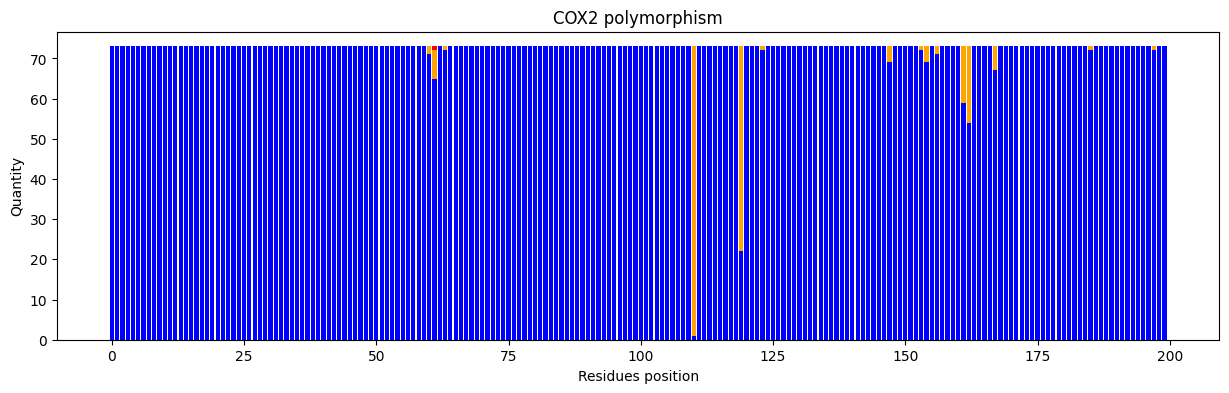

In [62]:
fig, ax = plt.subplots(figsize=(15,4))
bottom = np.zeros(3)

colors = ['blue', 'orange', 'red', 'violet', 'brown', 'cyan', 'gray', 'pink']

for x, lista in dicmat.items():
  bottom = 0
  for n in range(len(lista)):
    color = colors[n]
    ax.bar(x=x, height=lista[n], bottom=bottom, color=color)
    bottom += lista[n]

ax.set_title("COX2 polymorphism")
ax.set_xlabel("Residues position")
ax.set_ylabel("Quantity")

plt.show()